In [1]:
!pip install catboost
!pip install skforecast
!pip install xgboost
!pip install lightgbm
!pip install nolds
!pip install pmdarima
!pip install feature-engine
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.2 MB/s eta 0:00:00


In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

filtered_grouped_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/zvezda/MIO_1/Corporación Favorita Grocery Sales Forecasting/Favorita_Grocery_df.xlsx',
                  index_col=[0])

In [4]:
def static_stacionar(data, SKU):
    import matplotlib.pyplot as plt

    random.seed(1)
    np.random.seed(1)

    end_train = '2016-06-01 23:59:59'
    end_valid = '2017-01-01 23:59:59'





    # Добавление прогноза на график
    plt.figure(figsize=(22, 6))
    plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
    plt.plot(data.index[(data.index <= end_valid) & (data.index >= end_train)], data[end_train:end_valid],label='Valid данные')
    plt.plot(data.index[data.index >= end_valid], data[end_valid:],label='Test данные')
    # Добавление точки на график

    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.title(f'График временного ряда с прогнозом forecaster SKU: {SKU}')
    plt.legend()
    plt.grid(True)
    plt.show()
    # diferenciator = TimeSeriesDifferentiator(order=1)
    # data_diff = diferenciator.fit_transform(data)
    # data_diff = pd.Series(data_diff, index=data.index).dropna()
    # data_diff

    print()
    stl = STL(data, seasonal=13)
    result = stl.fit()

    fig, axes = plt.subplots(4, 1, sharex=False)
    fig.suptitle(f' SKU: {SKU} STL Decomposition', fontsize=16)
    fig.set_size_inches(22, 12)

    # График исходных данных
    axes[0].plot(result.observed)
    axes[0].set_title('Observed')
    axes[0].grid(True)

    # График тренда
    axes[1].plot(result.trend)
    axes[1].set_title('Trend')
    axes[1].grid(True)

    # График сезонности
    axes[2].plot(result.seasonal)
    axes[2].set_title('Seasonality')
    axes[2].grid(True)

    # График остатка
    axes[3].plot(result.resid)
    axes[3].set_title('Residuals')
    axes[3].grid(True)

    # Добавляем пространство между графиками
    plt.subplots_adjust(hspace=0.5)

    # Показываем графики
    plt.show()
    # ===================================


    print()

    #=======================================

    # acf_values_1 = acf(data)

    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика автокорреляционной функции с указанием подграфика для отображения
    plot_acf(data, lags=47, ax=ax)

    # Отображение графика
    plt.show()
    print()


    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика функции частичной автокорреляции с указанием подграфика для отображения
    from statsmodels.graphics.tsaplots import plot_pacf
    plot_pacf(data, lags=47, ax=ax)

    # Отображение графика
    plt.show()

    print()
    import nolds
    from scipy.stats import entropy
    from scipy.fft import fft
    from statsmodels.stats.diagnostic import acorr_ljungbox
    from statsmodels.tsa.stattools import adfuller


    from statsmodels.tsa.stattools import kpss


    coef_hurst = nolds.hurst_rs(data)




    # Применение быстрого преобразования Фурье (FFT) к временному ряду
    fft_result = fft(data.values.tolist())
    # Вычисление амплитудного спектра
    amplitude_spectrum = np.abs(fft_result)
    # Нормализация амплитудного спектра
    normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
    # Вычисление спектральной энтропии
    feat_spectral = entropy(normalized_spectrum,base=len(data))


    box_pierce = acorr_ljungbox(data,boxpierce=True)
    ljung_box = acorr_ljungbox(data)
    #=============================
    kpss_stat,p_value, lags,crit = kpss(data,regression = 'ct')



    #=============================

    adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(data)




    # sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
    # plt.show()

    unitroot_kpss = kpss(data,regression = 'ct')

    shift_level_index= data.rolling(window=10).mean().idxmax()
    print()
    print(f'SKU: {SKU} CТАТИСТИКА ОСНОВАНАЯ НА R')
    print()
    print('coef_hurst коэффициент Херста',coef_hurst)
    if coef_hurst < 0.5:
        print("Ряд имеет антипериодическую зависимость (значения в противоположных направлениях)")
    elif coef_hurst == 0.5:
        print("Ряд не имеет зависимости")
    else:
        print("Ряд имеет периодическую зависимость (значения в одном направлении)")
    print()
    print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
    print()
    print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
    print()
    print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
    print()
    print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
    print()
    print('____________________________________')
    print()
    print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n')
    print()
    # check p-value against significance level
    if p_value < 0.05:
        print('I По p-value, ряд НЕ стационарен метод KPSS')
    else:
        print('I По p-value, ряд стационарен метод KPSS')

    # check KPSS statistic against critical value

    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)
    # print('resstore', resstore)
    print()
    print('Дики — Фуллера проверки на стационарность , \n')
    print('kpss_stat', adf)
    print('pvalue', pvalue)
    print('usedlag', usedlag)
    print('nobs', nobs)
    print('critical_values', critical_values)

    print('Results of Dickey-Fuller Test:')

    if pvalue <= 0.05:
        print('I По p-value, ряд стационарен метод ADF')
    else:
        print('I По p-value, ряд НЕ стационарен метод ADF')

    # check ADF statistic against critical value
    if abs(adf) > abs(max(critical_values.values())):
        print('II По значению ADF статистики, ряд стационарен, метод ADF' )
    else:
        print('II По значению ADF статистики, ряд НЕ стационарен, метод ADF')
    # print('resstore', resstore)

    print()



In [5]:
import numpy as np
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller


def static_resid(residuals,y_pred,SKU,model,name_regress):

    # Работа с остатками после обученя модели

    # График остатков
    plt.subplots(figsize=(22, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title(f'SKU_{SKU}_{model}_{name_regress} График остатков')
    plt.show()
    print()

    # Q-Q график
    plt.subplots(figsize=(22, 6))
    stats.probplot(residuals, dist='norm', plot=plt)
    plt.title(f'SKU_{SKU}_{model}_{name_regress} Q-Q график остатков')
    plt.show()
    print()
    # Диаграмма распределения остатков
    plt.figure(figsize=(22, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Остатки')
    plt.ylabel('Частота')
    plt.title(f'SKU_{SKU}_{model}_{name_regress} Диаграмма распределения остатков')
    plt.show()
    print()

    # Визуализация ACF остатков
    fig, ax = plt.subplots(figsize=(22, 6))
    # Построение графика автокорреляционной функции с указанием подграфика для отображения
    plot_acf(residuals, lags=10, ax=ax)
    # Отображение графика
    plt.show()
    print()

    # Визуализация PACF остатков
    fig, ax = plt.subplots(figsize=(22, 6))
    plot_pacf(residuals, lags=10, ax=ax)
    # Отображение графика
    plt.show()
    print()

    print(f"Статисткика по остаткам SKU_{SKU}_{model}_{name_regress}")
    # Применение теста Шапиро-Уилка к остаткам
    shapiro_test = stats.shapiro(residuals)

    # Проверка условия и вывод сообщения
    if shapiro_test.pvalue >= 0.05:
        print('Остатки временного ряда распределены согласно нормальному закону')
    else:
        print('Остатки временного ряда НЕ распределены согласно нормальному закону')
    # Вывод результатов
    print('Статистика теста Шапиро-Уилка :', shapiro_test.statistic)
    print('p-value Шапиро-Уилка :', shapiro_test.pvalue)
    print()
    print('Тест Бокса-Пирса (BP) и Льюнга-Бокса (LB) на определение шума в остатках')
    box_pierce = acorr_ljungbox(residuals,boxpierce=True)
    box_pierce['result'] = box_pierce.apply(lambda row: 'белый шум' if row['lb_pvalue'] >= 0.05 and row['bp_pvalue'] >= 0.05 else 'не белый шум', axis=1)
    print(box_pierce)
    # Тест Дарбина-Уотсона
    print()
    dw_test = sm.stats.stattools.durbin_watson(residuals)
    print('Тест Дарбина-Уотсона:', dw_test)
    if dw_test < 1.0:
        print("Положительная автокорреляция первого порядка в остатках.")
    elif dw_test > 3.0:
        print("Отрицательная автокорреляция первого порядка в остатках.")
    else:
        print("Отсутствие автокорреляции первого порядка в остатках.")

    print()

    print('Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)')
    #KPSS
    kpss_stat,p_value, lags,crit = kpss(residuals,regression = 'ct')
    # check p-value against significance level
    if p_value < 0.05:
        print('I По p-value, ряд НЕ стационарен метод KPSS')
    else:
        print('I По p-value, ряд стационарен метод KPSS')

    # check KPSS statistic against critical value

    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)



    print()
    print('Тест на стационарность Дики-Фуллера (Dickey-Fuller test')
    adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(residuals)
    print()
    print('Дики — Фуллера проверки на стационарность , \n')
    print('kpss_stat', adf)
    print('pvalue', pvalue)
    print('usedlag', usedlag)
    print('nobs', nobs)
    print('critical_values', critical_values)

    print('Results of Dickey-Fuller Test:')

    if pvalue <= 0.05:
        print('I По p-value, ряд стационарен метод ADF')
    else:
        print('I По p-value, ряд НЕ стационарен метод ADF')

    # check ADF statistic against critical value
    if abs(adf) > abs(max(critical_values.values())):
        print('II По значению ADF статистики, ряд стационарен, метод ADF' )
    else:
        print('II По значению ADF статистики, ряд НЕ стационарен, метод ADF')
    # print('resstore', resstore)

    print()



In [7]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

from pmdarima.arima.utils import nsdiffs
from pmdarima.arima.utils import ndiffs
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
import shap
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

import random
res_df = None


def func_model(data, SKU):


    random.seed(1)
    np.random.seed(1)

    end_train = '2016-06-01 23:59:59'
    end_valid = '2017-01-01 23:59:59'




    # Добавление прогноза на график
    plt.figure(figsize=(22, 6))
    plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
    plt.plot(data.index[(data.index <= end_valid) & (data.index >= end_train)], data[end_train:end_valid],label='Valid данные')
    plt.plot(data.index[data.index >= end_valid], data[end_valid:],label='Test данные')
    # Добавление точки на график
    # plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
    # plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.title(f'График временного ряда с прогнозом forecaster SKU: {SKU}')
    plt.legend()
    plt.grid(True)
    plt.show()
    # diferenciator = TimeSeriesDifferentiator(order=1)
    # data_diff = diferenciator.fit_transform(data)
    # data_diff = pd.Series(data_diff, index=data.index).dropna()
    # data_diff


    kpss_stat,p_value, lags,crit = kpss(data,regression = 'ct')
    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)

    n_diffs = ndiffs(data, test='kpss')

    print("ndiffs нужно ли делать дифференцацию:", n_diffs)


    # Определение количества сезонных разностей
    n_seasonal_diffs = nsdiffs(data,m=4)

    print("nsdiffs Сколько diff надо применить к данным:", n_seasonal_diffs)



    print()
    stl = STL(data, seasonal=13)
    result = stl.fit()

    fig, axes = plt.subplots(4, 1, sharex=False)
    fig.suptitle(f' SKU: {SKU} STL Decomposition', fontsize=16)
    fig.set_size_inches(22, 12)

    # График исходных данных
    axes[0].plot(result.observed)
    axes[0].set_title('Observed')
    axes[0].grid(True)

    # График тренда
    axes[1].plot(result.trend)
    axes[1].set_title('Trend')
    axes[1].grid(True)

    # График сезонности
    axes[2].plot(result.seasonal)
    axes[2].set_title('Seasonality')
    axes[2].grid(True)

    # График остатка
    # axes[3].plot(result.resid)
    # axes[3].set_title('Residuals')
    # axes[3].grid(True)

    axes[3].scatter(range(len(result.resid)), result.resid)
    axes[3].set_title('Residuals')
    axes[3].grid(True)
    # Проведение прямой линии через y=0
    axes[3].axhline(y=0, color='red', linestyle='--')

    # Добавляем пространство между графиками
    plt.subplots_adjust(hspace=0.5)

    # Показываем графики
    plt.show()
    # ===================================


    print()

    # отстаки после обучени STL

    fig, ax = plt.subplots(figsize=[22, 12])
    plot_acf(
        x=result.resid,
        lags=52,
        ax=ax,
        alpha=0.05
    )
    ax.set_title("Autocorrelation of residual after STL")
    ax.set_ylabel("Autcorrelation")
    ax.set_xlabel("Lag")
    # plt.tight_layout()
    plt.show()
    print()
    #=======================================

    # acf_values_1 = acf(data)

    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика автокорреляционной функции с указанием подграфика для отображения
    plot_acf(data, lags=47,alpha=0.05,auto_ylims=True, ax=ax)

    # Отображение графика
    plt.show()
    print()



    # Создание подграфика с нужным размером
    fig, ax = plt.subplots(figsize=(22, 6))

    # Построение графика функции частичной автокорреляции с указанием подграфика для отображения

    plot_pacf(data, lags=47,method='ywmle',alpha=0.05, auto_ylims=True,ax=ax)

    # Отображение графика
    plt.show()

    #=======================================

    # Data partition train-test
    # ==============================================================================


    print(
        f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
        f"(n={len(data.loc[:end_train])})")
    print(
        f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
        f"(n={len(data.loc[end_train:end_valid])})")

    print(
        f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
        f"(n={len(data.loc[end_valid:])})")


    # Forecasting with differentiation
    # ==============================================================================
    steps = len(data.loc[end_train:])

    lags_grid = [4,5, 8, [1, 2, 3, 27 ,52]]

    # Regressor hyperparameters search space
    def search_space_cb_52(trial):
        search_space  = {
            'depth' : trial.suggest_int('depth', 9, 12, step=1),
            'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
            'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
        }
        return search_space


    calendar_features_52 = pd.DataFrame(index=data.index)
    calendar_features_52['Values'] = data
    calendar_features_52['month'] = calendar_features_52.index.month
    calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
    calendar_features_52['year'] = calendar_features_52.index.year

    calendar_features_52["month_sin"] = np.sin(calendar_features_52["month"] / calendar_features_52["month"].max() * 2 * np.pi)
    calendar_features_52["month_cos"] = np.cos(calendar_features_52["month"] / calendar_features_52["month"].max() * 2 * np.pi)

    calendar_features_52["week_of_year_sin"] = np.sin(calendar_features_52["week_of_year"] / calendar_features_52["week_of_year"].max() * 2 * np.pi)
    calendar_features_52["week_of_year_cos"] = np.cos(calendar_features_52["week_of_year"] / calendar_features_52["week_of_year"].max() * 2 * np.pi)

    transformer = DatetimeFeatures(
                  variables           = "index",
                  features_to_extract = "all" # It is also possible to select specific features
              )
    calendar_features_52 = transformer.fit_transform(calendar_features_52)
    calendar_features_52.drop(['week','day_of_week','weekend','hour','minute','second'],inplace=True,axis=1)

    calendar_features_52["quarter_sin"] = np.sin(calendar_features_52["quarter"] / calendar_features_52["quarter"].max() * 2 * np.pi)
    calendar_features_52["quarter_cos"] = np.cos(calendar_features_52["quarter"] / calendar_features_52["quarter"].max() * 2 * np.pi)

    calendar_features_52["semester_sin"] = np.sin(calendar_features_52["semester"] / calendar_features_52["semester"].max() * 2 * np.pi)
    calendar_features_52["semester_cos"] = np.cos(calendar_features_52["semester"] / calendar_features_52["semester"].max() * 2 * np.pi)

    calendar_features_52["day_of_month_sin"] = np.sin(calendar_features_52["day_of_month"] / calendar_features_52["day_of_month"].max() * 2 * np.pi)
    calendar_features_52["day_of_month_cos"] = np.cos(calendar_features_52["day_of_month"] / calendar_features_52["day_of_month"].max() * 2 * np.pi)

    calendar_features_52["day_of_year_sin"] = np.sin(calendar_features_52["day_of_year"] / calendar_features_52["day_of_year"].max() * 2 * np.pi)
    calendar_features_52["day_of_year_cos"] = np.cos(calendar_features_52["day_of_year"] / calendar_features_52["day_of_year"].max() * 2 * np.pi)

    calendar_features_52['num_iter'] = range(0, len(data))

    # cyclical = CyclicalFeatures(variables=None, drop_original=False)

    # calendar_features_52 = cyclical.fit_transform(calendar_features_52[['month','week_of_year']])
    global res_df
    res_df = calendar_features_52



    forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=963,silent=True),
                    lags      = 52,
                    differentiation = 1
                )



    # bayesian_search_forecaster(
    #                                   forecaster         = forecaster_cb_52_best_params_exog,
    #                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
    #                                   exog               = calendar_features_52.loc[:end_valid,calendar_features_52.columns.to_list()[1:]],
    #                                   steps              = 52,
    #                                   metric             = 'mean_absolute_error',
    #                                   search_space       = search_space_cb_52,
    #                                   lags_grid          = lags_grid,
    #                                   initial_train_size = len(data[:end_train]),
    #                                   refit              = False,
    #                                   n_trials           = 20, # Increase for more exhaustive search
    #                                   random_state       = 123,
    #                                   return_best        = True,
    #                                   n_jobs             = 'auto',
    #                                   verbose            = False,
    #                                   show_progress      = False
    #                               )

    X_train_1, y_train_1 = forecaster_cb_52_best_params_exog.create_train_X_y(
                       y    = calendar_features_52.loc[:end_train,'Values'],
                       exog = calendar_features_52.loc[:end_train,calendar_features_52.columns.to_list()[1:]])

    forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                          exog =calendar_features_52.loc[:end_train,calendar_features_52.columns.to_list()[1:]]
                                          )

    # get_rfe(CatBoostRegressor(random_state=963,silent=True),
    #         X_train_1,
    #         y_train_1)

    get_import_feat(forecaster_cb_52_best_params_exog,
                    calendar_features_52.loc[:end_train,calendar_features_52.columns.to_list()[1:]],
                    calendar_features_52.loc[:end_train,'Values'])





    # predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
    #                                                         steps=steps,
    #                                                         exog = calendar_features_52.loc[end_train:,calendar_features_52.columns.to_list()[1:]]
    #                                                                       )


    # # Hyperparameters search tuning
    # # ==============================================================================
    # forecaster_cb_ht = ForecasterAutoreg(
    #                 regressor = CatBoostRegressor(random_state=963,silent=True),
    #                 lags      = 52,
    #                 differentiation = 1
    #             )


    # bayesian_search_forecaster(
    #                                   forecaster         = forecaster_cb_ht,
    #                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
    #                                   exog               = calendar_features_52.loc[:end_valid,calendar_features_52.columns.to_list()[1:]],
    #                                   steps              = 10,
    #                                   metric             = 'mean_absolute_error',
    #                                   search_space       = search_space_cb_52,
    #                                   lags_grid          = lags_grid,
    #                                   initial_train_size = len(data[:end_train]),
    #                                   refit              = False,
    #                                   n_trials           = 20, # Increase for more exhaustive search
    #                                   random_state       = 123,
    #                                   return_best        = True,
    #                                   n_jobs             = 'auto',
    #                                   verbose            = False,
    #                                   show_progress      = False
    #                               )


    # metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
    #                           forecaster         = forecaster_cb_ht,
    #                           y                  = calendar_features_52['Values'],
    #                           exog               = calendar_features_52.iloc[:,1:],
    #                           steps              = 10,
    #                           metric             = 'mean_absolute_error',
    #                           initial_train_size = len(data.loc[:end_train]),
    #                           refit              = False,
    #                           n_jobs             = 'auto',
    #                           verbose            = False,
    #                           show_progress      = False
    #                       )

    # # backtesting hyper tuning errors___________
    # # Расчет MAE

    # error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)


    # # Расчет RMSE
    # error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)

    # r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)

    # mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)


    # # Plot
    # fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    # data.loc[:end_train].plot(ax=ax, label='train',color='#1f77b4')
    # data.loc[end_train:].plot(ax=ax, label='test',color='black')
    # predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost',color='green')

    # ax.set_title(f'SKU: {SKU} *_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
    # ax.set_xlabel('')
    # ax.grid(True)
    # ax.legend()
    # plt.show()
    # print()

    # fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    # data.loc[end_train:].plot(ax=ax, label='test', color='black')
    # predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost', color='green')

    # ax.set_title(f'SKU: {SKU} *_1_3 model max SIZE Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
    # ax.set_xlabel('')
    # ax.grid(True)
    # ax.legend()
    # plt.show()
    # print()


    # dict_regress = {'Catboost':predict_cb_52_best_params_exog}

    # for regress in dict_regress:
    #     residuals = data.loc[end_train:]['unit_sales'] - dict_regress[regress]
    #     static_resid(residuals,dict_regress[regress],SKU, '*_1_3 model',regress)




    # #================back_ht
    # fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    # data.loc[:end_train].plot(ax=ax, label='train',color='#1f77b4')
    # data.loc[end_train:].plot(ax=ax, label='test',color='black')
    # predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost',color='green')

    # ax.set_title(f'SKU: {SKU} *_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning + EXOG по 10 недель добавляет данные из test в обучение')
    # ax.set_xlabel('')
    # ax.grid(True)
    # ax.legend()
    # plt.show()
    # print()

    # fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
    # data.loc[end_train:].plot(ax=ax, label='test',color='black')
    # predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost',color='green')

    # ax.set_title(f'SKU: {SKU} *_2_3 max SIZE Forecasting with differentiation with Backtesting with Hyper Tuning + EXOG по 10 недель добавляет данные из test в обучение')
    # ax.set_xlabel('')
    # ax.grid(True)
    # ax.legend()
    # plt.show()
    # print()


    # dict_regress_2 = {'Catboost':predictions_cb_back_ht}

    # for regress_2 in dict_regress_2:
    #     residuals_2 = data.loc[end_train:]['unit_sales'] - dict_regress[regress_2]
    #     static_resid(residuals_2, dict_regress[regress_2],SKU, '*_2_3 model',regress_2)



    # #==============52 недели без обучения + EXOG дучшая модель ================


    # # Расчет MAE

    # error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)


    # # Расчет RMSE
    # error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)


    # # Расчет R2
    # r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)


    # mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)


    # print()
    # print(f'SKU: {SKU} *_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
    # # Вывод результатов
    # print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")

    # print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")

    # print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")

    # print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")

    # print()
    # print()




    # #Backtesting hyper tuning ______________errors

    # print(f'SKU: {SKU} *_2_3 model Ошибки при прогнозе backtesting hyper tuning + EXOG Catboost,XGB, LGB по 10 недель добавляет данные из test в обучение')
    # # Вывод результатов
    # print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")

    # print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")

    # print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")

    # print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")

    # print()

    # print()


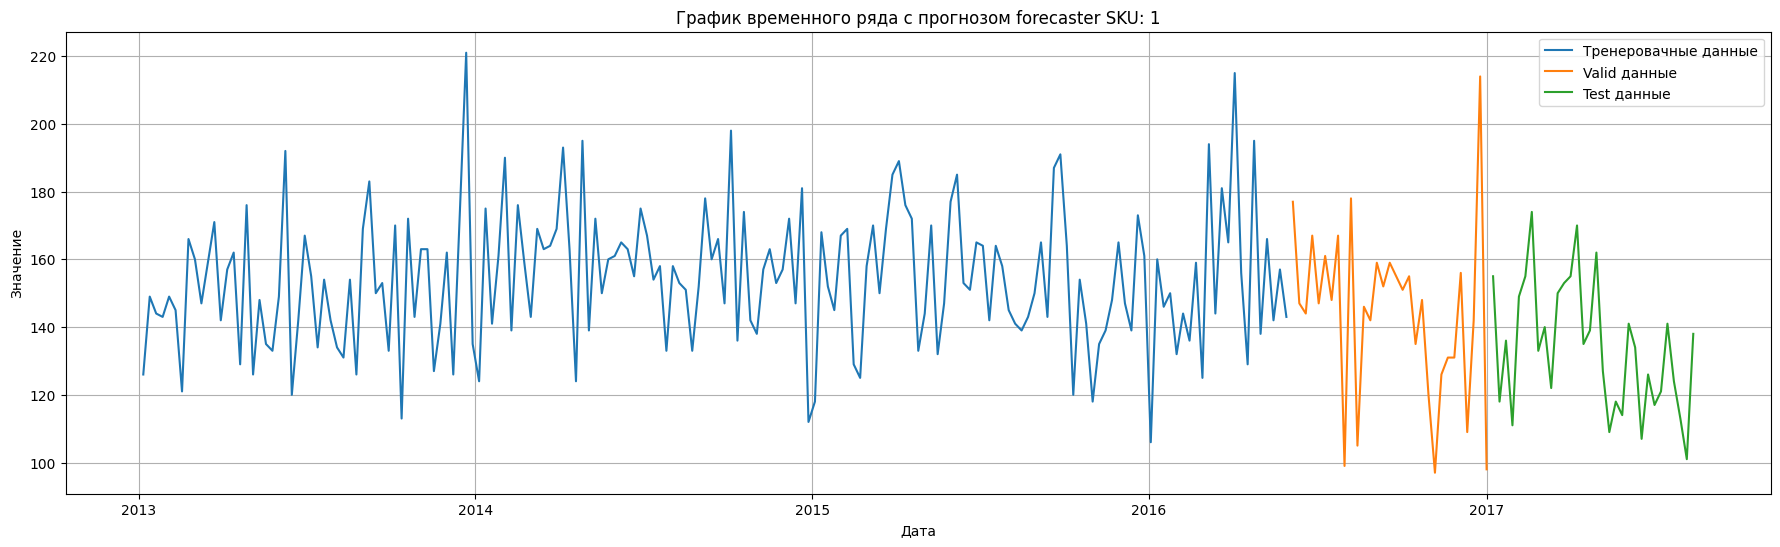

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



II По значению KPSS статистики, ряд НЕ стационарен метод KPSS

kpss_stat 0.368302824539519
p_value 0.01
lags 6
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
ndiffs нужно ли делать дифференцацию: 1
nsdiffs Сколько diff надо применить к данным: 0



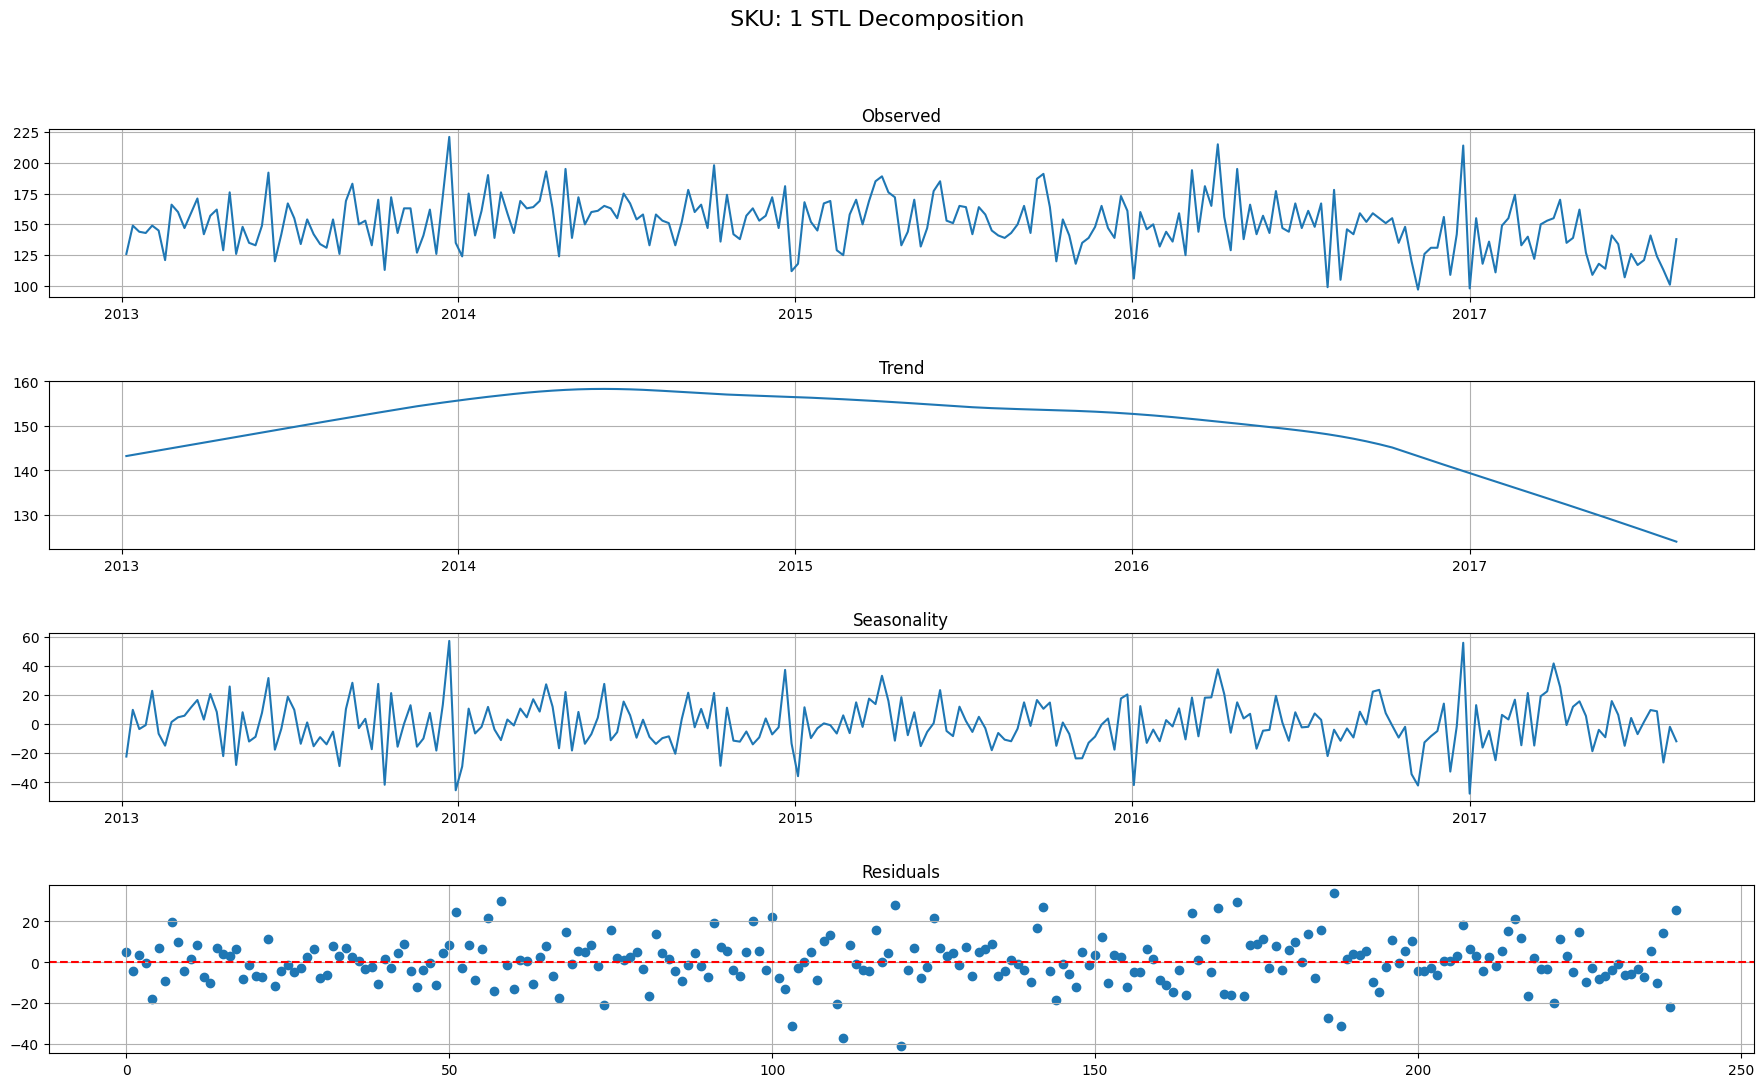

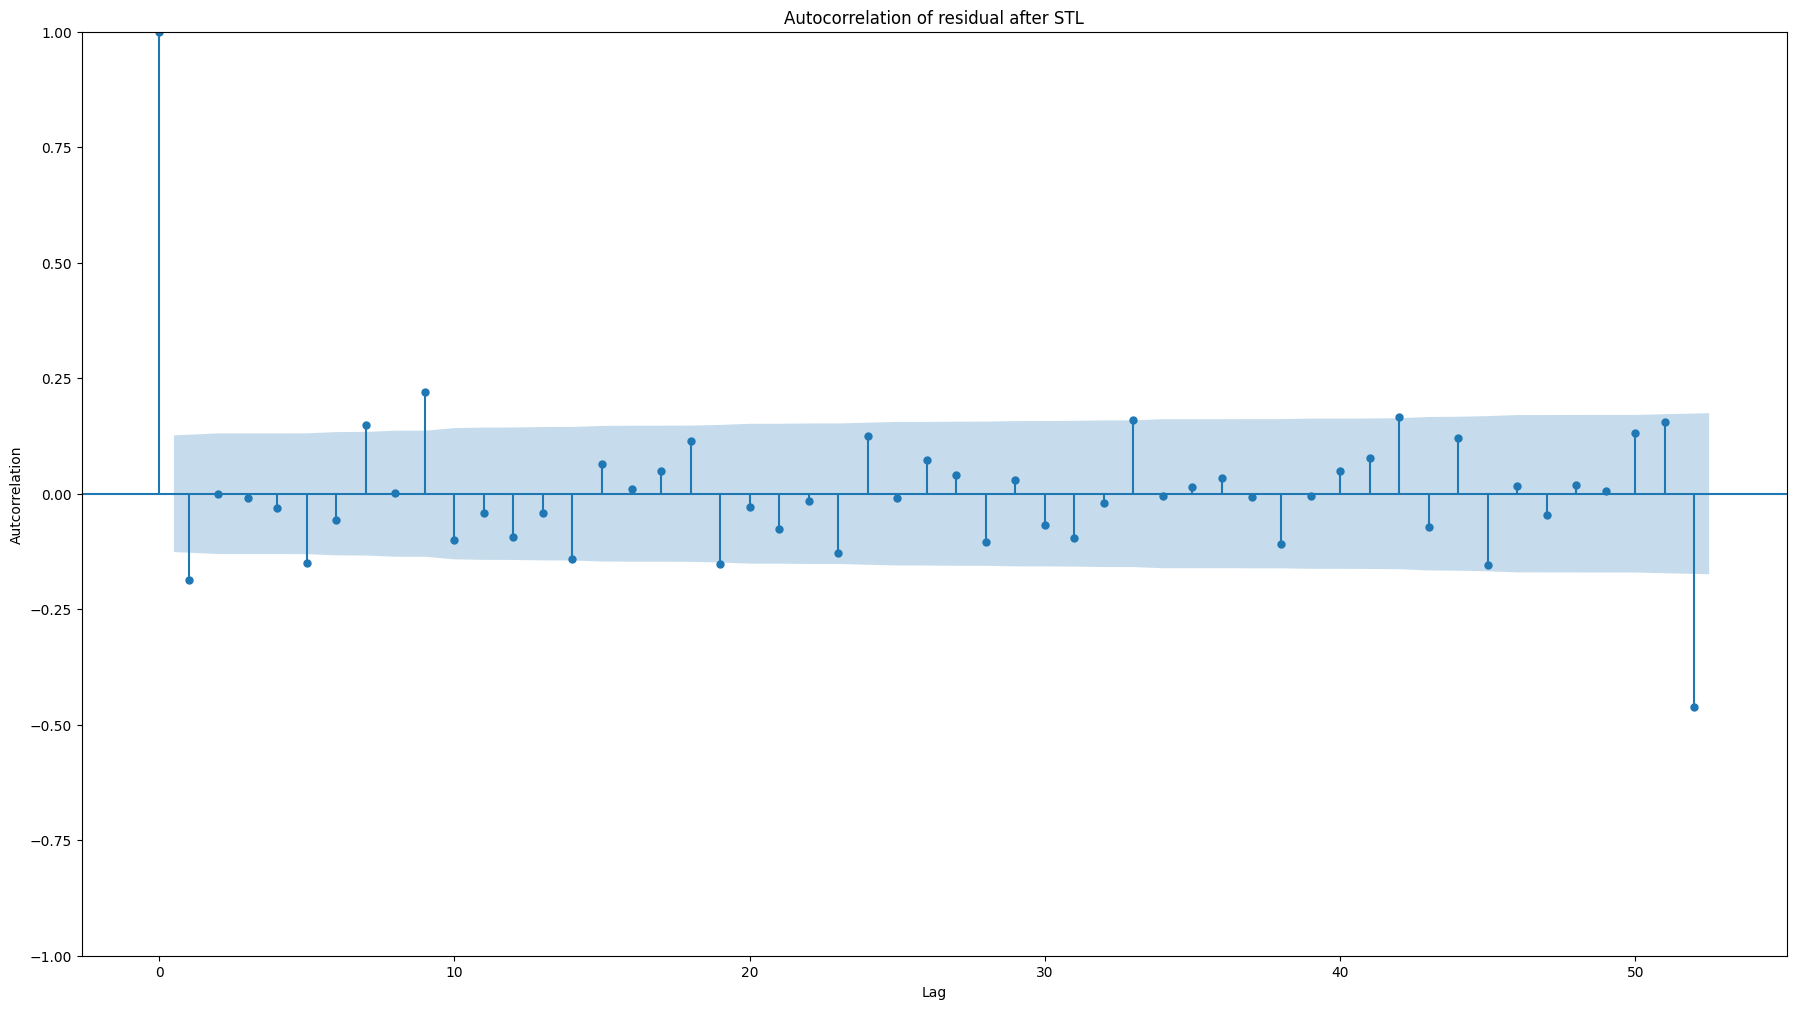

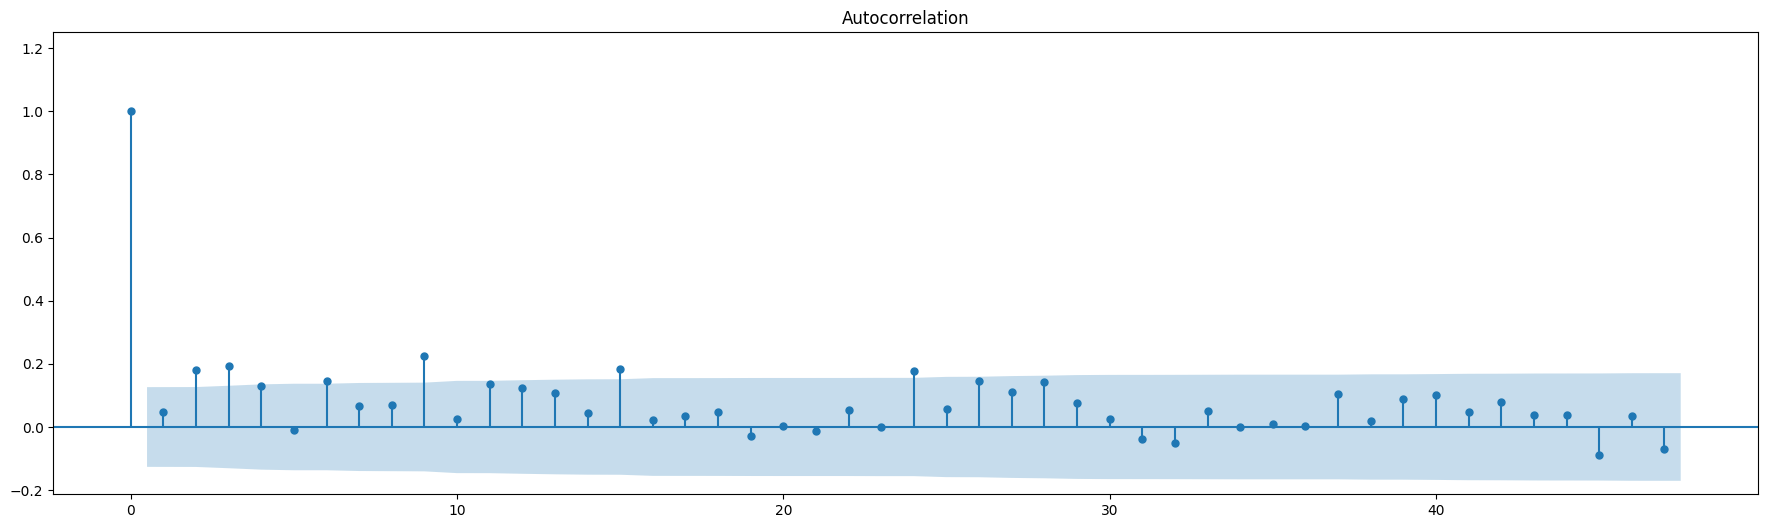

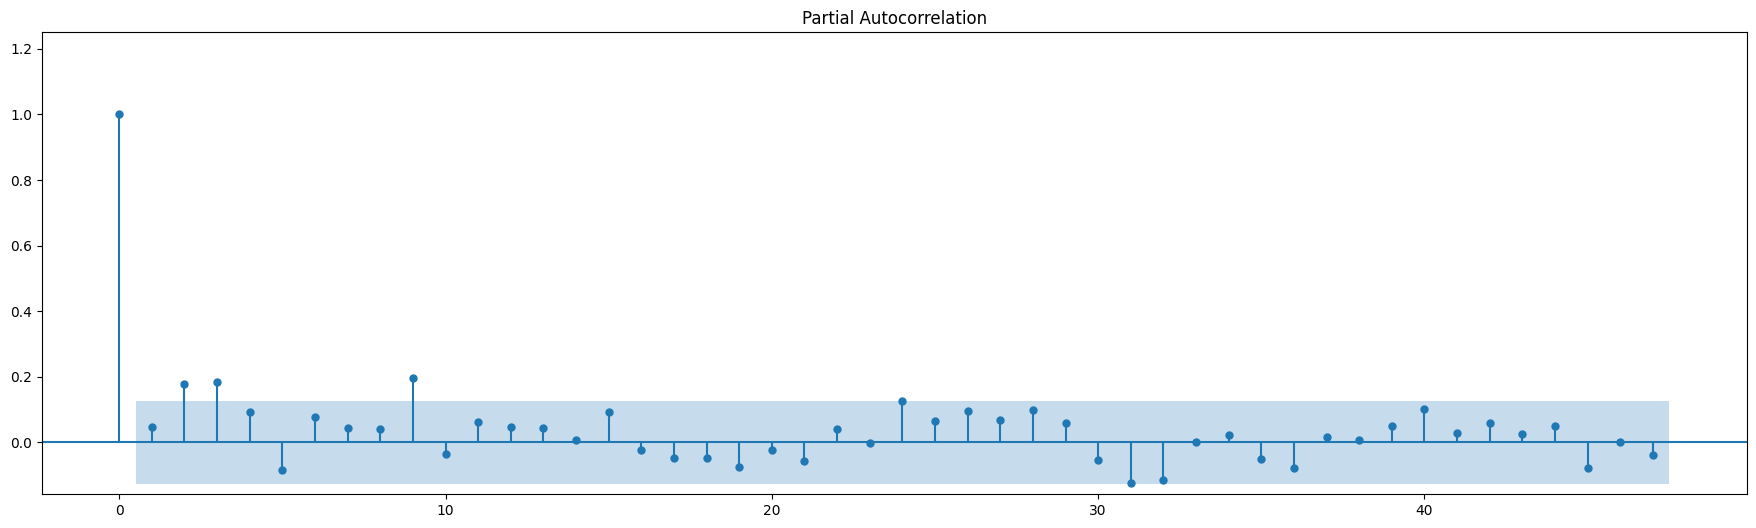

Train dates : 2013-01-06 00:00:00 --- 2016-05-29 00:00:00  (n=178)
Valid dates  : 2016-06-05 00:00:00 --- 2017-01-01 00:00:00  (n=31)
Test dates  : 2017-01-08 00:00:00 --- 2017-08-13 00:00:00  (n=32)
            feature  importance
0             lag_1   21.823222
51           lag_52    4.372096
12           lag_13    3.753553
8             lag_9    3.687477
1             lag_2    3.181410
49           lag_50    2.761183
32           lag_33    2.491004
10           lag_11    2.107406
7             lag_8    1.993418
33           lag_34    1.890303
50           lag_51    1.616842
77  day_of_year_sin    1.554153
40           lag_41    1.464365
25           lag_26    1.434479
3             lag_4    1.369841
54             year    1.332850
13           lag_14    1.325731
31           lag_32    1.273267
4             lag_5    1.247974
48           lag_49    1.190196
            lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  lag_9  \
date                                               

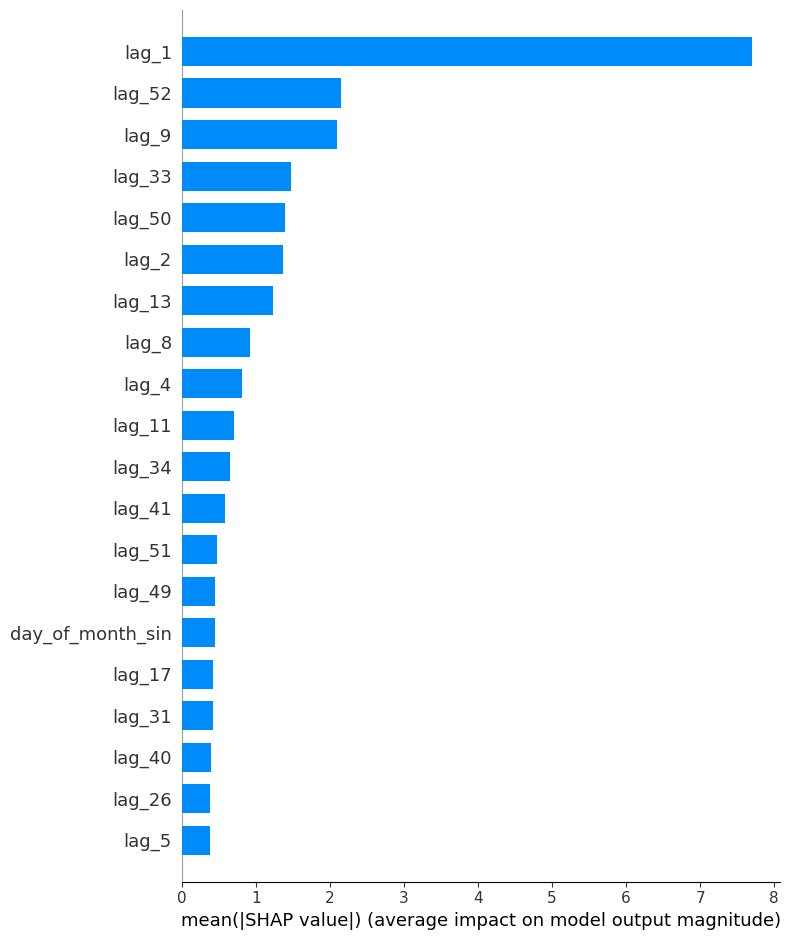

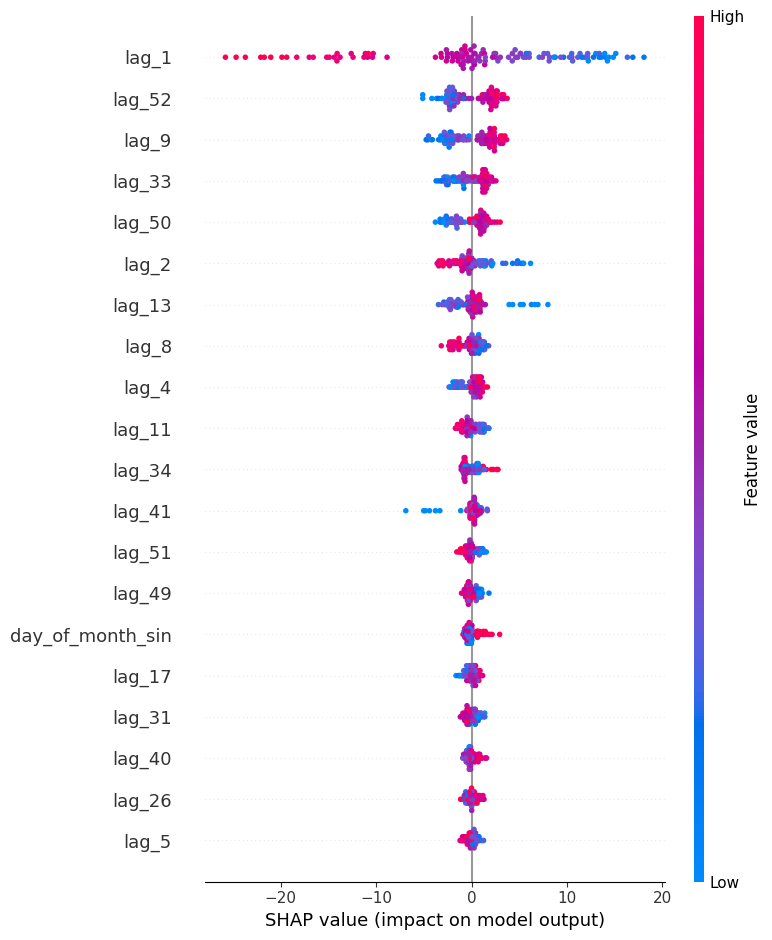

In [11]:
for sku in range(1,2):
    even_df = filtered_grouped_data[filtered_grouped_data['store_nbr']==sku][['date','unit_sales']]
    even_df['date'] = pd.to_datetime(even_df['date'])
    even_df = even_df.set_index('date')
    even_df = even_df.asfreq('D')
    weekly_df = even_df.resample('W').sum()


    func_model(weekly_df[:-1],sku)
    # static_stacionar(weekly_df[:-1], sku)

In [9]:

def get_import_feat(model,x,y):
        # Predictors importances
        # ==============================================================================
    imp = model.get_feature_importances()

    print(imp.sort_values(by='importance', ascending=False)[:20])


        # Create SHAP explainer
    X_train, y_train = model.create_train_X_y(
                       y    = y,
                       exog = x
                   )
    print(X_train)
    # ==============================================================================
    explainer = shap.TreeExplainer(model.regressor)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    shap.summary_plot(shap_values, X_train)

In [10]:
def get_rfe(model, X,y):

    rfe = RFE(estimator=model, n_features_to_select=6)
    rfe.fit(X,y)
    print(X.shape[1])

    for i, col in zip(range(X.shape[1]),X.columns):
        print(f'{col} selected={rfe.support_[i]} rank = {rfe.ranking_[i]}')

In [ ]:
end_train = '2016-06-01 23:59:59'
end_valid = '2017-01-01 23:59:59'
res_df.loc[:end_valid,res_df.columns.to_list()[1:]]


In [1]:
!pip install git+https://github.com/dllllb/pytorch-lifestream.git@main
!pip install -U 'torch<2'
!pip install -U 'pytorch-lightning<2'
!pip install -U "torchvision<0.15.1"
!pip install duckdb

  Cloning https://github.com/dllllb/pytorch-lifestream.git (to revision main) to /tmp/pip-req-build-u7sooifi
  Running command git clone --filter=blob:none --quiet https://github.com/dllllb/pytorch-lifestream.git /tmp/pip-req-build-u7sooifi
  Resolved https://github.com/dllllb/pytorch-lifestream.git to commit ca9a2c18bcec7c71b3b06db403809f046c9c83bf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lifestream 0.5.3 requires torch==1.12.*, but you have torch 1.13.1 which is incompatible.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which 

In [2]:
!pip install umap-learn
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=848d39620eae9ee401f40472c863c1e73d6ea5f831175e0e56470cf63496faf6
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.8 MB/s eta 0:00:00


In [8]:
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')


filtered_grouped_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/zvezda/MIO_1/Corporación Favorita Grocery Sales Forecasting/Favorita_Grocery_df.xlsx',
                  index_col=[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from functools import partial
from datetime import timedelta

import numpy as np
import pandas as pd

import catboost
import matplotlib.pyplot as plt
import seaborn as sns
import umap

import torch
import pytorch_lightning as pl
from torch.utils.data.dataloader import DataLoader
from pytorch_lightning.loggers import TensorBoardLogger

from sklearn.model_selection import train_test_split

from ptls.nn import TrxEncoder
from ptls.nn.seq_encoder.rnn_encoder import RnnEncoder
from ptls.frames import PtlsDataModule
from ptls.frames.coles import CoLESModule
from ptls.frames.coles.split_strategy import SampleSlices
from ptls.frames.coles.multimodal_dataset import MultiModalDataset
from ptls.frames.coles.multimodal_dataset import MultiModalIterableDataset
from ptls.frames.coles.multimodal_dataset import MultiModalSortTimeSeqEncoderContainer
from ptls.frames.coles.multimodal_inference_dataset import MultiModalInferenceDataset
from ptls.frames.coles.multimodal_inference_dataset import MultiModalInferenceIterableDataset
from ptls.frames.inference_module import InferenceModuleMultimodal
from ptls.data_load.iterable_processing import SeqLenFilter
from ptls.data_load import IterableProcessingDataset
from ptls.data_load.utils import collate_feature_dict
from ptls.data_load.datasets import MemoryMapDataset
from ptls.preprocessing import PandasDataPreprocessor

In [10]:
filtered_grouped_data = filtered_grouped_data.fillna(0)
filtered_grouped_data['date'] = pd.to_datetime(filtered_grouped_data['date'])
filtered_grouped_data

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
793,793,2013-01-02,1,314384,41,0.0
1820,1820,2013-01-02,2,314384,69,0.0
2943,2943,2013-01-02,3,314384,143,0.0
4126,4126,2013-01-02,4,314384,71,0.0
5169,5169,2013-01-02,5,314384,82,0.0
...,...,...,...,...,...,...
125405050,125405050,2017-08-15,6,314384,46,1.0
125407310,125407310,2017-08-15,7,314384,42,1.0
125409589,125409589,2017-08-15,8,314384,46,1.0
125411984,125411984,2017-08-15,9,314384,35,1.0


In [21]:
# Load pretrained preprocessor
%%time


import pickle
from ptls.preprocessing import PandasDataPreprocessor



preprocessor = PandasDataPreprocessor(
    col_id='id',
    col_event_time='date',
    event_time_transformation='dt_to_timestamp',
    cols_category=['store_nbr','item_nbr','onpromotion'],
    cols_numerical=['unit_sales'],
    return_records=True,
)
dataset = preprocessor.fit_transform(filtered_grouped_data)

CPU times: user 11.2 s, sys: 225 ms, total: 11.5 s
Wall time: 13.8 s


In [22]:
dataset[:5]

[{'id': 793,
  'event_time': tensor([1357084800]),
  'store_nbr': tensor([8]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([1]),
  'unit_sales': tensor([41])},
 {'id': 1820,
  'event_time': tensor([1357084800]),
  'store_nbr': tensor([1]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([1]),
  'unit_sales': tensor([69])},
 {'id': 2943,
  'event_time': tensor([1357084800]),
  'store_nbr': tensor([2]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([1]),
  'unit_sales': tensor([143])},
 {'id': 4126,
  'event_time': tensor([1357084800]),
  'store_nbr': tensor([4]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([1]),
  'unit_sales': tensor([71])},
 {'id': 5169,
  'event_time': tensor([1357084800]),
  'store_nbr': tensor([5]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([1]),
  'unit_sales': tensor([82])}]

In [23]:
import pickle

with open('preprocessor.p', 'wb') as f:
    pickle.dump(preprocessor, f)

In [24]:
dataset = sorted(dataset, key=lambda x: x['id'])
dataset[-5:]

[{'id': 125405050,
  'event_time': tensor([1502755200]),
  'store_nbr': tensor([9]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([2]),
  'unit_sales': tensor([46])},
 {'id': 125407310,
  'event_time': tensor([1502755200]),
  'store_nbr': tensor([6]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([2]),
  'unit_sales': tensor([42])},
 {'id': 125409589,
  'event_time': tensor([1502755200]),
  'store_nbr': tensor([7]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([2]),
  'unit_sales': tensor([46])},
 {'id': 125411984,
  'event_time': tensor([1502755200]),
  'store_nbr': tensor([3]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([2]),
  'unit_sales': tensor([35])},
 {'id': 125414089,
  'event_time': tensor([1502755200]),
  'store_nbr': tensor([10]),
  'item_nbr': tensor([1]),
  'onpromotion': tensor([2]),
  'unit_sales': tensor([15])}]

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)

len(train), len(test)

(13428, 3358)

In [26]:
train[0].keys()

dict_keys(['id', 'event_time', 'store_nbr', 'item_nbr', 'onpromotion', 'unit_sales'])

In [27]:
from functools import partial
from ptls.nn import TrxEncoder, RnnSeqEncoder
from ptls.frames.coles import CoLESModule

trx_encoder_params = dict(
    embeddings_noise=0.003,
    numeric_values={'unit_sales': 'identity'},
    embeddings={
        'store_nbr': {'in': 800, 'out': 16},
        'item_nbr': {'in': 250, 'out': 16},
        'onpromotion': {'in': 250, 'out': 16},
        'event_time': {'in': 800, 'out': 16},
    },
)

seq_encoder = RnnSeqEncoder(
    trx_encoder=TrxEncoder(**trx_encoder_params),
    hidden_size=512,
    type='gru',
)

model = CoLESModule(
    seq_encoder=seq_encoder,
    optimizer_partial=partial(torch.optim.Adam, lr=0.001),
    lr_scheduler_partial=partial(torch.optim.lr_scheduler.StepLR, step_size=30, gamma=0.9),
)

In [28]:
from ptls.data_load.datasets import MemoryMapDataset
from ptls.data_load.iterable_processing import SeqLenFilter
from ptls.frames.coles import ColesDataset
from ptls.frames.coles.split_strategy import SampleSlices
from ptls.frames import PtlsDataModule

train_dl = PtlsDataModule(
    train_data=ColesDataset(
        MemoryMapDataset(
            data=train,
            i_filters=[
                SeqLenFilter(min_seq_len=25),
            ],
        ),
        splitter=SampleSlices(
            split_count=5,
            cnt_min=25,
            cnt_max=200,
        ),
    ),
    train_num_workers=16,
    train_batch_size=512,
)

In [29]:
import torch
import pytorch_lightning as pl

import logging

trainer = pl.Trainer(
    max_epochs=15,
    gpus=1 if torch.cuda.is_available() else 0,
    enable_progress_bar=False,
)


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [31]:
%%time
print(f'logger.version = {trainer.logger.version}')
trainer.fit(model, train_dl)
print(trainer.logged_metrics)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name               | Type            | Params
-------------------------------------------------------
0 | _loss              | ContrastiveLoss | 0     
1 | _seq_encoder       | RnnSeqEncoder   | 923 K 
2 | _validation_metric | BatchRecallTopK | 0     
3 | _head              | Head            | 0     
-------------------------------------------------------
923 K     Trainable params
0         Non-trainable params
923 K     Total params
3.694     Total estimated model params size (MB)


logger.version = 1


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [32]:
torch.save(seq_encoder.state_dict(), "coles-emb.pt")

In [39]:
seq_encoder.state_dict()

OrderedDict([('trx_encoder.embeddings.store_nbr.weight',
              tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
                      [ 1.9821, -0.9676,  0.0250,  ...,  0.5338, -0.6125,  1.9742],
                      [ 0.5530,  1.1205, -0.3242,  ..., -1.5334,  0.2849, -0.8362],
                      ...,
                      [ 0.5865, -1.8225,  0.9823,  ...,  0.4618,  0.1688, -0.8173],
                      [ 0.4852, -0.8200,  0.7393,  ...,  0.4954, -0.3480, -0.3238],
                      [ 1.8437,  0.1520,  0.6039,  ...,  0.7219,  1.0806,  0.6757]])),
             ('trx_encoder.embeddings.item_nbr.weight',
              tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
                        0.0000e+00,  0.0000e+00],
                      [ 3.0244e-01,  1.6889e+00, -1.6625e+00,  ...,  5.3995e-01,
                        3.8224e-01, -1.3147e+00],
                      [ 1.6987e+00, -1.8492e+00,  5.4463e-01,  ...,  8.7486e-01,
          

In [40]:
# embedding inference

from ptls.data_load.datasets import inference_data_loader

train_dl = inference_data_loader(train, num_workers=0, batch_size=256)
train_embeds = torch.vstack(trainer.predict(model, train_dl, ))

test_dl = inference_data_loader(test, num_workers=0, batch_size=256)
test_embeds = torch.vstack(trainer.predict(model, test_dl))

train_embeds.shape, test_embeds.shape

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


(torch.Size([13428, 512]), torch.Size([3358, 512]))

In [41]:

train_embeds

tensor([[ 6.8672e-01, -3.5226e-01,  3.6232e-01,  ...,  8.2251e-01,
         -1.0209e-01, -4.4406e-01],
        [ 6.3257e-01, -2.3787e-01,  1.7234e-01,  ...,  7.8679e-01,
         -8.4723e-02, -4.3725e-01],
        [ 6.7852e-01, -4.5500e-01,  3.6170e-01,  ...,  8.2316e-01,
         -1.0411e-01, -4.7826e-01],
        ...,
        [ 6.4493e-01, -3.5811e-01,  2.2799e-01,  ...,  8.1160e-01,
          5.9606e-04, -4.0590e-01],
        [ 3.5357e-01, -2.7102e-01, -1.2615e-01,  ...,  7.0684e-01,
          1.4784e-01, -1.9596e-01],
        [ 3.7209e-01, -3.6176e-01, -7.0804e-02,  ...,  6.9598e-01,
          1.4687e-01, -2.0718e-01]])

In [43]:
train_df = pd.DataFrame(data=train_embeds, columns=[f'embed_{i}' for i in range(train_embeds.shape[1])])


In [44]:
train_df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_502,embed_503,embed_504,embed_505,embed_506,embed_507,embed_508,embed_509,embed_510,embed_511
0,0.686715,-0.352259,0.362321,-0.640940,-0.396750,-0.227460,0.234272,-0.809809,-0.548292,-0.688215,...,0.443648,0.992588,-0.769318,0.579350,0.955747,0.152274,0.851492,0.822506,-0.102092,-0.444061
1,0.632572,-0.237875,0.172337,-0.574610,-0.063303,-0.294759,-0.129850,-0.464709,-0.417160,-0.318098,...,0.318491,0.944568,-0.551820,0.422105,0.823316,0.101314,0.640091,0.786789,-0.084723,-0.437254
2,0.678516,-0.455000,0.361701,-0.637067,-0.452311,-0.204135,0.120947,-0.762051,-0.524908,-0.683234,...,0.436684,0.991991,-0.763155,0.596420,0.944711,0.157854,0.847840,0.823160,-0.104108,-0.478256
3,0.668858,-0.389865,0.374887,-0.637354,-0.380891,-0.113224,0.067346,-0.766030,-0.539018,-0.671150,...,0.460353,0.991359,-0.750090,0.554964,0.945022,0.147264,0.836392,0.825196,-0.110881,-0.447609
4,0.307302,-0.349676,-0.128314,-0.425131,0.107066,-0.187764,-0.546239,0.051451,-0.386871,0.154826,...,0.370106,0.677162,-0.248950,0.109479,0.653828,0.108476,0.255241,0.667089,0.175580,-0.153583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13423,0.663978,-0.369436,0.358603,-0.634507,-0.324722,-0.103750,-0.013850,-0.727740,-0.514542,-0.623086,...,0.437225,0.988774,-0.723163,0.534855,0.926700,0.139558,0.811915,0.825453,-0.112835,-0.451191
13424,0.673511,-0.482299,0.416453,-0.638599,-0.600783,-0.163194,0.399833,-0.884362,-0.637488,-0.826539,...,0.569387,0.995707,-0.846187,0.615381,0.985303,0.193819,0.910903,0.818019,-0.075845,-0.416061
13425,0.644926,-0.358114,0.227992,-0.592420,-0.147722,-0.242055,-0.185616,-0.481115,-0.382643,-0.335687,...,0.426029,0.930012,-0.486640,0.375884,0.821121,0.058623,0.627857,0.811596,0.000596,-0.405903
13426,0.353565,-0.271021,-0.126149,-0.439087,0.138977,-0.200423,-0.551047,-0.062880,-0.356980,0.136077,...,0.365873,0.671991,-0.248930,0.127687,0.492223,0.137662,0.274841,0.706839,0.147845,-0.195958
